In [ ]:
!c:\Users\furla\AppData\Local\Programs\Python\Python313\python.exe -m pip install unidecode


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!c:\Users\furla\AppData\Local\Programs\Python\Python313\python.exe -m pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install seaborn
!pip install unidecode
!pip install scikit-learn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint
from unidecode import unidecode

project_dir = r'C:\Users\furla\OneDrive\Desktop\APS360'

# Defines folder paths for train, validation, and test tensors
train_folder = os.path.join(project_dir, 'combined_tensors_train')
val_folder = os.path.join(project_dir, 'combined_tensors_val')
test_folder = os.path.join(project_dir, 'combined_tensors_test')

# Define paths for the metadata CSV files
train_csv_path = os.path.join(project_dir, 'final_train_metadata.csv')
val_csv_path = os.path.join(project_dir, 'final_val_metadata.csv')
test_csv_path = os.path.join(project_dir, 'final_test_metadata.csv')



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\furla\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\furla\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\furla\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
# Function to convert tensors into a single feature vector
def convertToVector(tensor):
    # Compute mean and standard deviation
    meanFeatures = np.mean(tensor, axis=0)
    stdFeatures = np.std(tensor, axis=0)
    # Concatenate into one feature vector
    return np.concatenate((meanFeatures, stdFeatures))


In [ ]:
# Training Data Processing

# Rename files in the training folder (Unicode)
train_fails = []
for file in os.listdir(train_folder):
    normalizedName = unidecode(file)
    if file != normalizedName:
        old_file_path = os.path.join(train_folder, file)
        new_file_path = os.path.join(train_folder, normalizedName)
        if os.path.exists(old_file_path):
            try:
                os.rename(old_file_path, new_file_path)
                print(f"Renamed: {file} -> {normalizedName}")
            except Exception as e:
                print(f"Error renaming {file}: {e}")
                train_fails.append((file, str(e)))
        else:
            print(f"File not found, skipping: {file}")
            train_fails.append((file, "File not found"))
print("Training Folder Rename Fails:")
for fail in train_fails:
    print(fail)

# Get list of training files (after renaming)
train_files = os.listdir(train_folder)

# Read training metadata CSV and normalize filenames
labelsDF = pd.read_csv(train_csv_path)
labelsDF[labelsDF.columns[0]] = labelsDF[labelsDF.columns[0]].apply(unidecode)

matchingLabelsDF = labelsDF[labelsDF[labelsDF.columns[0]].isin(train_files)]
matchingLabelsDF = matchingLabelsDF.sort_values(by=labelsDF.columns[0])
yTrain = matchingLabelsDF.iloc[:, 1:].values

# Build xTrain using the matching filenames from the CSV
matchingTrainFilenames = matchingLabelsDF[labelsDF.columns[0]].tolist()
vectorList = []
for filename in matchingTrainFilenames:
    fullPath = os.path.join(train_folder, filename)
    tensor = np.load(fullPath)
    vectorList.append(convertToVector(tensor))
xTrain = np.array(vectorList)

print("Training Data Shapes:")
print("xTrain:", xTrain.shape)
print("yTrain:", yTrain.shape)


Error renaming BÃ¼cher__Medienkarriere_Lametta__Co_Werner_Schneyder_Dieter_Hildebrandt.npy: [WinError 3] The system cannot find the path specified: 'C:\\Users\\furla\\OneDrive\\Desktop\\APS360\\combined_tensors_train\\BÃ¼cher__Medienkarriere_Lametta__Co_Werner_Schneyder_Dieter_Hildebrandt.npy' -> 'C:\\Users\\furla\\OneDrive\\Desktop\\APS360\\combined_tensors_train\\BA 1/4cher__Medienkarriere_Lametta__Co_Werner_Schneyder_Dieter_Hildebrandt.npy'
Error renaming Die_Macht_der_GefÃ¼hle_Geschwister_Hofmann.npy: [WinError 3] The system cannot find the path specified: 'C:\\Users\\furla\\OneDrive\\Desktop\\APS360\\combined_tensors_train\\Die_Macht_der_GefÃ¼hle_Geschwister_Hofmann.npy' -> 'C:\\Users\\furla\\OneDrive\\Desktop\\APS360\\combined_tensors_train\\Die_Macht_der_GefA 1/4hle_Geschwister_Hofmann.npy'
Error renaming FÃ¼r_immer_und_ewig_Geschwister_Hofmann.npy: [WinError 3] The system cannot find the path specified: 'C:\\Users\\furla\\OneDrive\\Desktop\\APS360\\combined_tensors_train\\FÃ¼r_

In [ ]:
# Validation Data Processing

# Rename files in the validation folder
val_fails = []
for file in os.listdir(val_folder):
    normalizedName = unidecode(file)
    if file != normalizedName:
        old_file_path = os.path.join(val_folder, file)
        new_file_path = os.path.join(val_folder, normalizedName)
        if os.path.exists(old_file_path):
            try:
                os.rename(old_file_path, new_file_path)
                print(f"Renamed: {file} -> {normalizedName}")
            except Exception as e:
                print(f"Error renaming {file}: {e}")
                val_fails.append((file, str(e)))
        else:
            print(f"File not found, skipping: {file}")
            val_fails.append((file, "File not found"))
print("Validation Folder Rename Fails:")
for fail in val_fails:
    print(fail)

# Read validation metadata CSV and normalize filenames
valLabelsDF = pd.read_csv(val_csv_path)
valLabelsDF[valLabelsDF.columns[0]] = valLabelsDF[valLabelsDF.columns[0]].apply(unidecode)

# Filter CSV for files that exist in the validation folder
val_files = os.listdir(val_folder)
matchingValLabelsDF = valLabelsDF[valLabelsDF[valLabelsDF.columns[0]].isin(val_files)]
matchingValLabelsDF = matchingValLabelsDF.sort_values(by=valLabelsDF.columns[0])
yVal = matchingValLabelsDF.iloc[:, 1:].values

# Build xVal using matching filenames from the validation CSV
matchingValFilenames = matchingValLabelsDF[valLabelsDF.columns[0]].tolist()
valVectorList = []
for filename in matchingValFilenames:
    fullValPath = os.path.join(val_folder, filename)
    tensor = np.load(fullValPath)
    valVectorList.append(convertToVector(tensor))
xVal = np.array(valVectorList)

print("Validation Data Shapes:")
print("xVal:", xVal.shape)
print("yVal:", yVal.shape)

# Concatenate training and validation data
xTrain = np.concatenate((xTrain, xVal), axis=0)
yTrain = np.concatenate((yTrain, yVal), axis=0)
print("Combined Training+Validation Shapes:")
print("xTrain:", xTrain.shape)
print("yTrain:", yTrain.shape)


Validation Folder Rename Fails:
Validation Data Shapes:
xVal: (1482, 78)
yVal: (1482, 11)
Combined Training+Validation Shapes:
xTrain: (7620, 78)
yTrain: (7620, 11)


In [ ]:
# Test Data Processing

# Rename files in the test folder (Unicode debug issue we had earlier)
test_fails = []
for file in os.listdir(test_folder):
    normalizedName = unidecode(file)
    if file != normalizedName:
        old_file_path = os.path.join(test_folder, file)
        new_file_path = os.path.join(test_folder, normalizedName)
        if os.path.exists(old_file_path):
            try:
                os.rename(old_file_path, new_file_path)
                print(f"Renamed: {file} -> {normalizedName}")
            except Exception as e:
                print(f"Error renaming {file}: {e}")
                test_fails.append((file, str(e)))
        else:
            print(f"File not found, skipping: {file}")
            test_fails.append((file, "File not found"))
print("Test Folder Rename Fails:")
for fail in test_fails:
    print(fail)

# Read test metadata CSV and normalize the filenames
testLabelsDF = pd.read_csv(test_csv_path)
testLabelsDF[testLabelsDF.columns[0]] = testLabelsDF[testLabelsDF.columns[0]].apply(unidecode)

# Filter the CSV for test files
test_files = os.listdir(test_folder)
matchingTestLabelsDF = testLabelsDF[testLabelsDF[testLabelsDF.columns[0]].isin(test_files)]
matchingTestLabelsDF = matchingTestLabelsDF.sort_values(by=testLabelsDF.columns[0])
yTest = matchingTestLabelsDF.iloc[:, 1:].values

# Build xTest using only the matching filenames from the test CSV
matchingTestFilenames = matchingTestLabelsDF[testLabelsDF.columns[0]].tolist()
testVectorList = []
for filename in matchingTestFilenames:
    fullTestPath = os.path.join(test_folder, filename)
    tensor = np.load(fullTestPath)
    testVectorList.append(convertToVector(tensor))
xTest = np.array(testVectorList)

print("Test Data Shapes:")
print("xTest:", xTest.shape)
print("yTest:", yTest.shape)


Test Folder Rename Fails:
Test Data Shapes:
xTest: (1463, 78)
yTest: (1463, 11)


In [ ]:
# Defines the baseline RandomForest regressor
rfRegressor = RandomForestRegressor(n_estimators=100, random_state=42)

# These are the hyperparameters used to tune
paramsdistRF = {
    'max_features': ['sqrt', 'log2', 0.1, 0.25, 0.5, 0.75, 1.0],
    'n_estimators': randint(50, 1000),
    'max_depth': range(10, 100),
    'bootstrap': [True, False]
}

# This scores the MSE (lower is better)
mseScorer = make_scorer(mean_squared_error, greater_is_better=False)

# RandomizedSearchCV for hyperparameter tuning
randSearchRF = RandomizedSearchCV(rfRegressor, param_distributions=paramsdistRF, cv=5, verbose=2,
                                  random_state=42, n_jobs=-1, n_iter=500, scoring=mseScorer)
randSearchRF.fit(xTrain, yTrain)

bestParamsRF = randSearchRF.best_params_
bestScoreRF = randSearchRF.best_score_
# Convert negative MSE to positive
bestMSE = -bestScoreRF

print("Best Hyperparameters:")
print(f"n_estimators: {bestParamsRF['n_estimators']}, max_features: {bestParamsRF['max_features']}, "
      f"max_depth: {bestParamsRF['max_depth']}, bootstrap: {bestParamsRF['bootstrap']}")
print(f"Best MSE on training: {bestMSE}")

# This defines and fits the best RandomForest regressor on the training data
bestRFRegressor = RandomForestRegressor(n_estimators=bestParamsRF['n_estimators'],
                                        max_features=bestParamsRF['max_features'],
                                        max_depth=bestParamsRF['max_depth'],
                                        bootstrap=bestParamsRF['bootstrap'],
                                        random_state=42)
bestRFRegressor.fit(xTrain, yTrain)

# This does the predictions on the test set
testPreds = bestRFRegressor.predict(xTest)

# Computes MSE for each output feature
featureMSEs = mean_squared_error(yTest, testPreds, multioutput='raw_values')

outputLabels = ["valence", "liveness", "time_signature", "energy", "speechiness",
                "instrumentalness", "acousticness", "tempo", "loudness", "danceability", "key"]

print("MSE for each feature on the test set:")
for i, feature in enumerate(outputLabels):
    print(f"{feature}: {featureMSEs[i]}")


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Hyperparameters:
n_estimators: 672, max_features: log2, max_depth: 95, bootstrap: False
Best MSE on training: 83.67924314268987
MSE for each feature on the test set:
valence: 0.04853245530445572
liveness: 0.027174217810552164
time_signature: 0.24194158067132318
energy: 0.025657810088887057
speechiness: 0.00704552925537435
instrumentalness: 0.08437960896374248
acousticness: 0.047267579072288665
tempo: 843.9381328992521
loudness: 13.85500619618969
danceability: 0.021674080577427344
key: 11.357900733889473


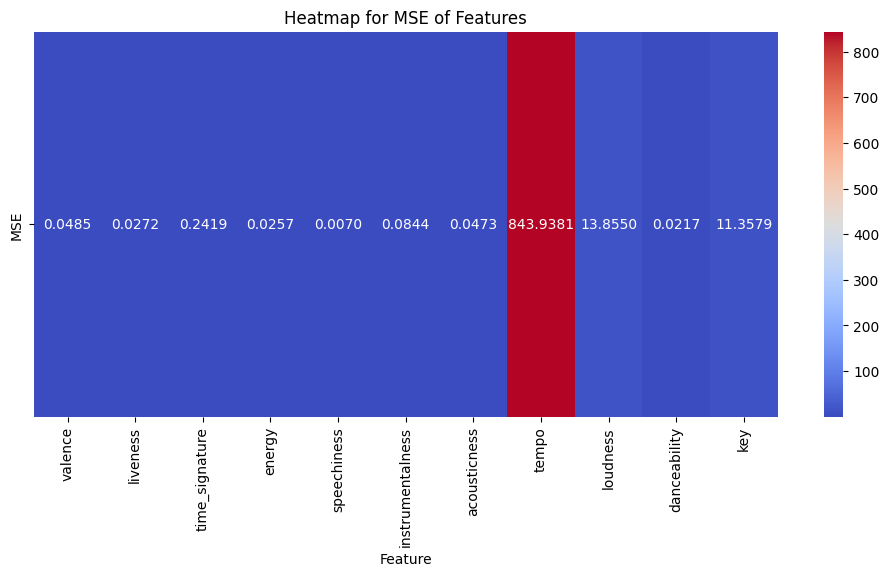

In [ ]:
# Plot Heatmap for MSE Values
def plot_mse_heatmap(mse_values, feature_names):
    mse_df = pd.DataFrame({"Feature": feature_names, "MSE": mse_values}).set_index("Feature")
    plt.figure(figsize=(12, 5))
    sns.heatmap(mse_df.T, annot=True, cmap="coolwarm", fmt=".4f")
    plt.title("Heatmap for MSE of Features")
    plt.show()

# Round the MSE values for display and plot
mse_values = np.round(np.array(featureMSEs), decimals=4)
plot_mse_heatmap(mse_values, outputLabels)
